# Face API Sample

face api는 인물 분석을 통해서 다양한 정보를 제공합니다. Azure Portal에서 Face API를 먼저 생성하고 접속에 필요한 URL과 subscription key를 가져와서 보여 줍니다.

관련된 라이브러리를 가져옵니다. request는 웹 통신을 위해서 가져오고 BytesIO, Image는 이미지를 처리하기 위해서 사용하고 있습니다. ImageDraw, ImageFont는 이미지 위에 선을 긋거나 글씨를 넣기 위해서 사용됩니다.

In [32]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

Subscription Key와 서비스의 주소 설정

In [33]:
subscription_key = 'cfed609ad3ef4031bb274bb3e808e302'

In [34]:
faceDetection_url = 'https://facedetect00.cognitiveservices.azure.com/face/v1.0/detect'

분석에 사용할 이미지를 확인

In [35]:
image_url = 'https://pbs.twimg.com/media/FFVu2dxaAAA6XxK.jpg:large'

In [36]:
img = Image.open(BytesIO(requests.get(image_url).content))

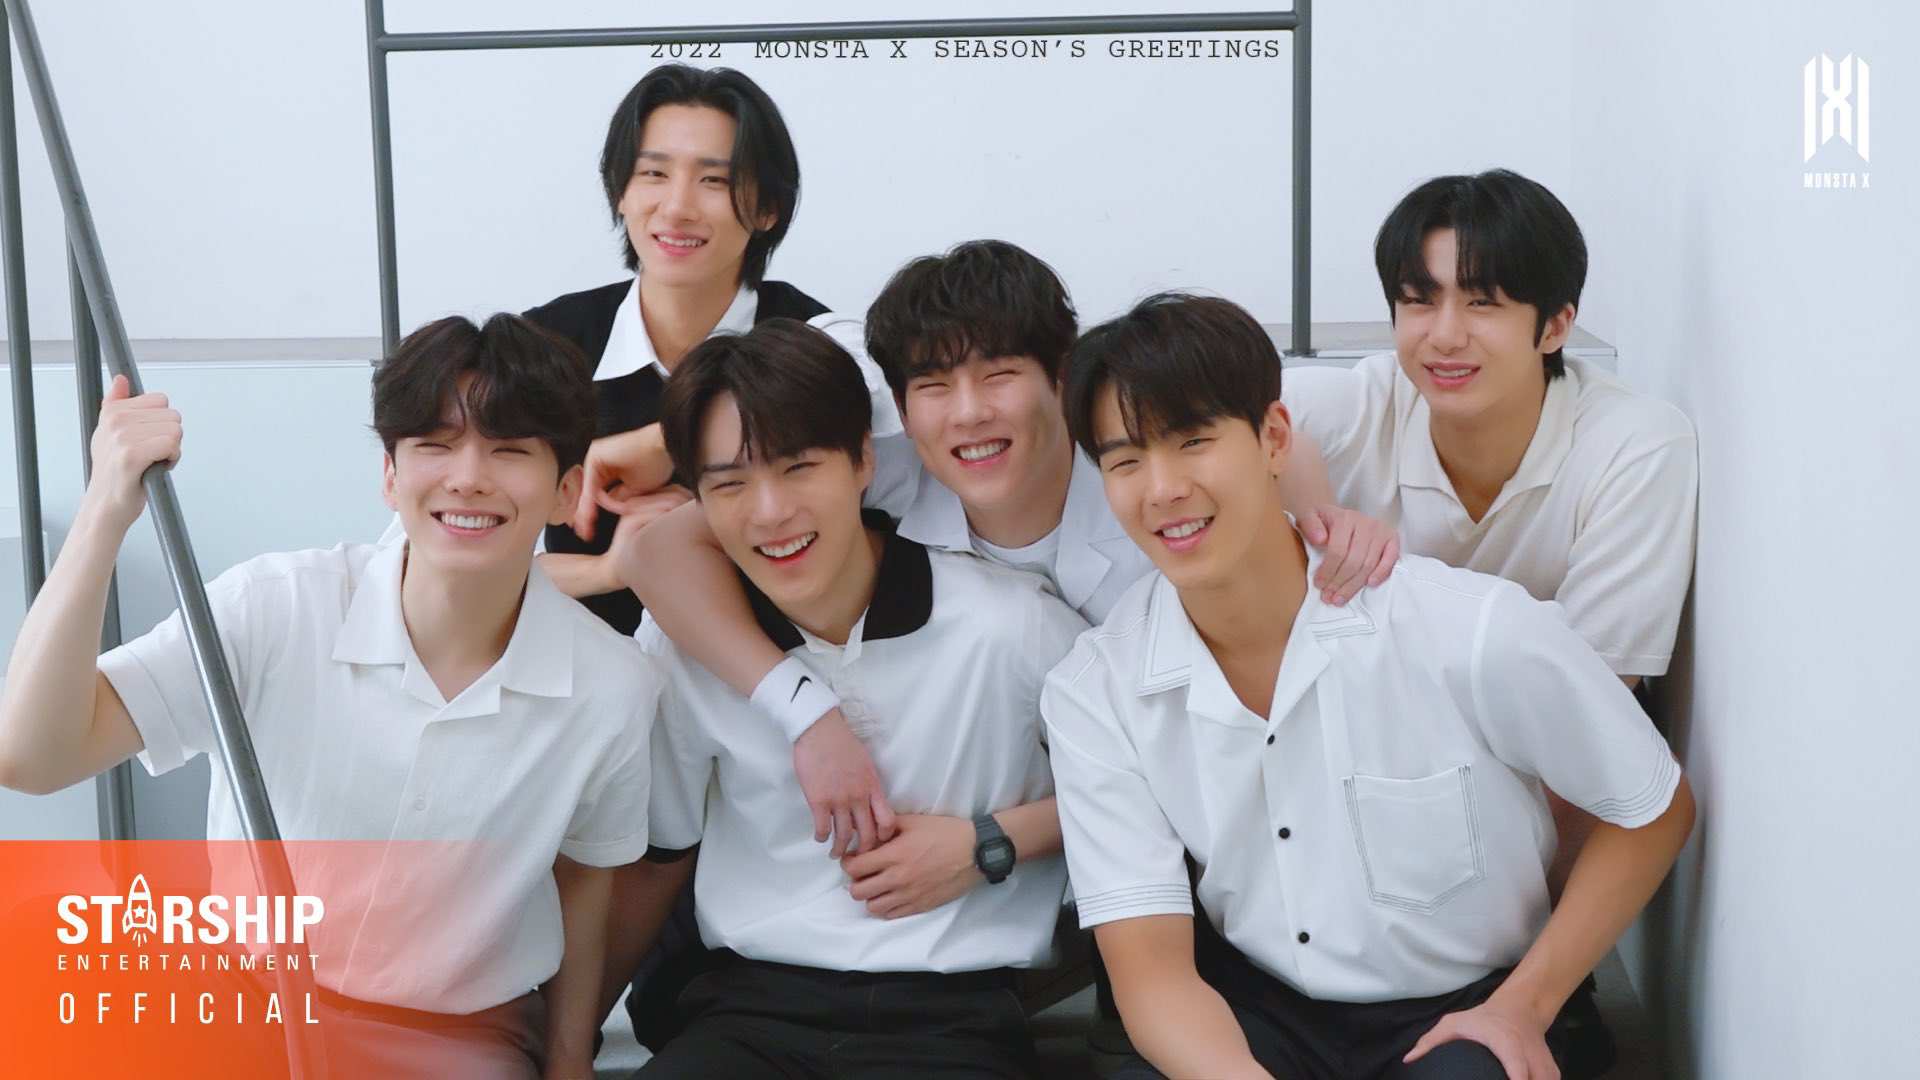

In [37]:
img

In [38]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params = {
    'returnFaceID' : 'true',
    'returnFaceAttributes' : 'age,gender,emotion'
}

In [39]:
data = {'url': image_url}

서비스를 호출해서 결과를 확인 합니다.

In [40]:
response = requests.post(faceDetection_url,
                        headers=headers,
                        params=params,
                        json=data)

In [41]:
faces = response.json()

In [42]:
faces

[{'faceId': '069d8156-8098-4f40-8c12-ba62c1b516ea',
  'faceRectangle': {'top': 385, 'left': 378, 'width': 180, 'height': 180},
  'faceAttributes': {'gender': 'male',
   'age': 22.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0}}},
 {'faceId': 'd4517cdb-1a50-4b88-b6b2-074d18f05602',
  'faceRectangle': {'top': 407, 'left': 1089, 'width': 162, 'height': 162},
  'faceAttributes': {'gender': 'male',
   'age': 20.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0}}},
 {'faceId': '7d3a3e4e-5e52-4474-b022-7230a9bc638b',
  'faceRectangle': {'top': 428, 'left': 692, 'width': 160, 'height': 160},
  'faceAttributes': {'gender': 'male',
   'age': 20.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.001,
    'fear': 0.0,
    'happiness': 0

In [43]:
draw = ImageDraw.Draw(img)

In [44]:
font = ImageFont.truetype("arial.ttf", 35)

for face in faces:
    rect = face['faceRectangle']
    
    left = rect['left']
    top = rect['top']
    width = rect['width']
    height = rect['height']

    draw.rectangle(((left, top,), (left+width, top+height)), outline='red')
    
    face_info = face['faceAttributes']
    emotion = face_info['emotion']
    happiness = emotion['happiness']
#     age = face_info['age']
    gender = face_info['gender']
#     result = 'Gender :'+str(gender)+' Age :'+str(age)
    result = 'Gender :'+str(gender)+'\nhappiness :'+str(happiness*100)
    
    draw.text((left, top), result, fill='red', font=font)

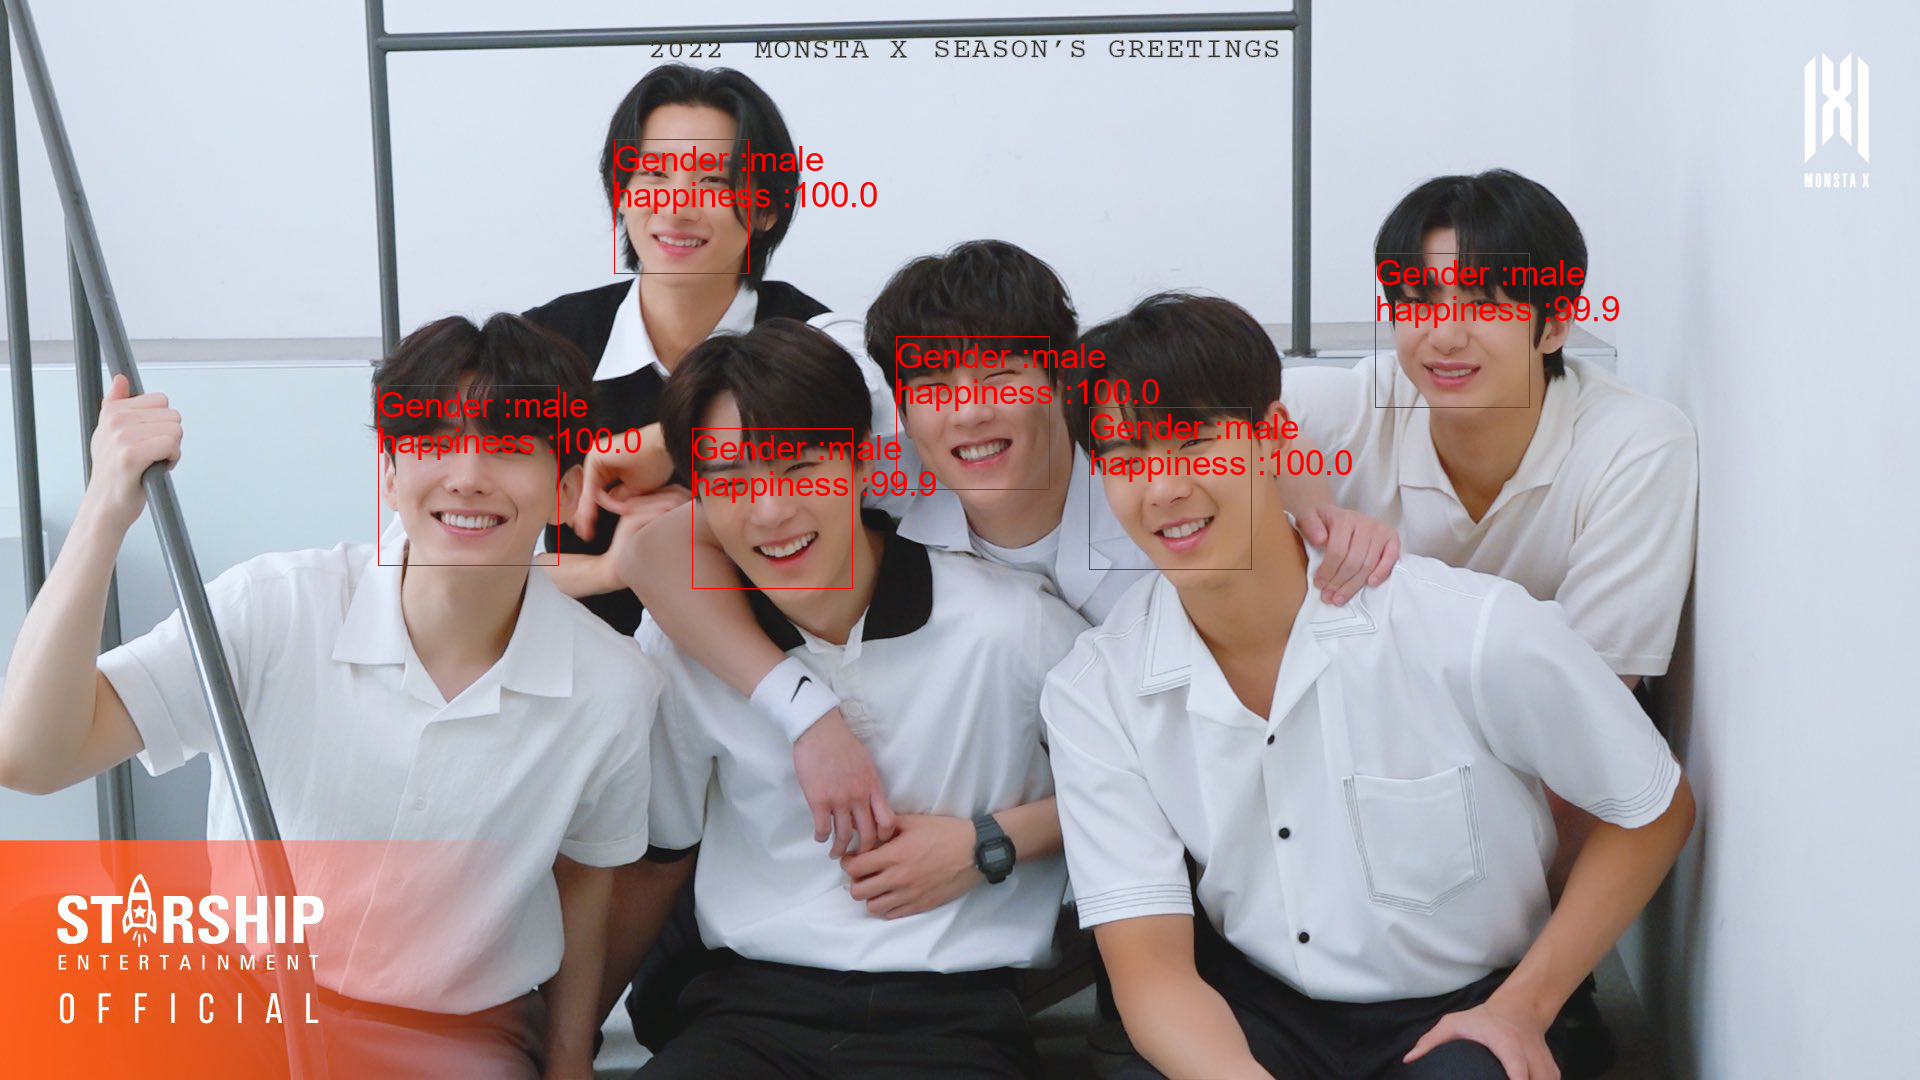

In [45]:
img